In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import luigi

PROJECT_DIR = os.path.join(os.getcwd(), os.pardir)
sys.path.insert(0,PROJECT_DIR)
%matplotlib inline

In [2]:
from src.data.download import DownloadData

In [3]:
#download data if not alrady there
luigi.build([DownloadData()], local_scheduler = True)

DEBUG: Checking if DownloadData() is complete
INFO: Informed scheduler that task   DownloadData__99914b932b   has status   DONE
INFO: Done scheduling tasks
INFO: Running Worker with 1 processes
DEBUG: Asking scheduler for work...
DEBUG: Done
DEBUG: There are no more tasks to run at this time
INFO: Worker Worker(salt=926099840, workers=1, host=DESKTOP-6UJS098, username=wertu, pid=13024) was stopped. Shutting down Keep-Alive thread
INFO: 
===== Luigi Execution Summary =====

Scheduled 1 tasks of which:
* 1 present dependencies were encountered:
    - 1 DownloadData()

Did not run any tasks
This progress looks :) because there were no failed tasks or missing external dependencies

===== Luigi Execution Summary =====



True

# Introduction

This notebook loads up the data, explores it a bit, and does some cleaning. It ultimately output the train and test csv files. It uses the _python-markdown_ extension for jupyter to display python output directly in markdown cells.

Provided you are using the environment described in the "environment.yml" file, you can activate the extension by running the following commands in your shell:
1. jupyter contrib nbextension install --sys-prefix
2. jupyter nbextension enable python-markdown



# Read and Summarize

Let's read in the data and quickly sumarize it.

In [4]:
df = pd.read_csv(os.path.join(PROJECT_DIR,"data/external/jokes.csv"),  encoding = "utf-8", index_col = "id")
df.head()

,date,downs,score,text,title,ups,upvote_ratio,url
id,,,,,,,,
6z8wju,1.505058e+09,0,1,"She cant make a Yo Mama Joke, oh wait, that’s ...",Yo Mama So Stupid.....,1,1.0,https://www.reddit.com/r/Jokes/comments/6z8wju...
6z8vwj,1.505058e+09,0,0,\nSnacks.,What do cannibals call midgets?,0,0.5,https://www.reddit.com/r/Jokes/comments/6z8vwj...
6z8vgv,1.505058e+09,0,1,I only come once a year,My wife makes me feel like christmas,1,1.0,https://www.reddit.com/r/Jokes/comments/6z8vgv...
6z8vea,1.505058e+09,0,1,Pennywise.,What do you call someone who gets their 1p cha...,1,1.0,https://www.reddit.com/r/Jokes/comments/6z8vea...
6z8v59,1.505058e+09,0,2,A chicken and an egg are lying in bed. The chi...,Who Came First,2,1.0,https://www.reddit.com/r/Jokes/comments/6z8v59...


Can see that there are {{df.shape[1]}} columns ({{df.shape[1] + 1}} including the id column). These columns are:


|Variable      | Description |
|:-------      | :------------:|
| **id**           | Unique identifier assigned by Reddit|
| **date**         | Post submission date, in Unix epoch time (seconds
| **since**        | January 1, 1970)
| **downs**        | Number of downvotes. Due to reddit protections, always equal to 0
| **score**        | Net upvotes (fuzzed)
| **text**         | Text of submission/post
| **title**        | Title of submission/post
| **ups**          | Number of upvotes. Due to reddit protections, this is equal to the score variable
| **upvote_ratio** | Upvote ratio, ratio of upvotes to total votes
| **url**           | Link to original post.

There are {{print("{:,}".format(df.shape[0]))}} records. A decent amount of data.

# Analyze scores

## Upvote Ratios

The _ups_ variable is the proxy that we will use for a joke's "funniness".

In [5]:
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99, 100]
pd.DataFrame({"percentile" : ["{0:0}%".format(val) for val in percentiles],
              "value" : np.percentile(df.upvote_ratio, q = percentiles)})

,percentile,value
0,1%,0.17
1,5%,0.27
2,10%,0.33
3,25%,0.50
4,50%,0.68
5,75%,0.83
6,90%,0.91
7,95%,0.95
8,99%,1.00
9,100%,1.00


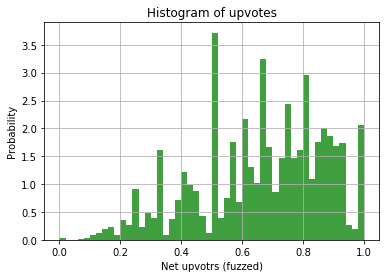

In [6]:
plt.hist(df.upvote_ratio, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Net upvotrs (fuzzed)')
plt.ylabel('Probability')
plt.title('Histogram of upvotes')
plt.grid(True)
plt.show()

## Net Upvotes

In [7]:
pd.DataFrame({"percentile" : ["{0:0}%".format(val) for val in percentiles],
              "value" : np.percentile(df.ups, q = percentiles)})

,percentile,value
0,1%,0.00
1,5%,0.00
2,10%,0.00
3,25%,0.00
4,50%,4.00
5,75%,20.00
6,90%,113.00
7,95%,321.70
8,99%,2583.54
9,100%,98086.00


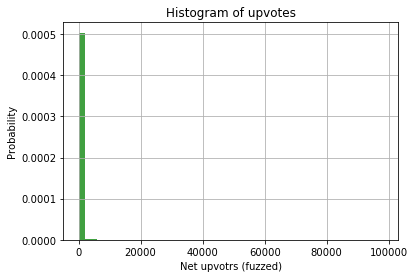

In [8]:
plt.hist(df.ups, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Net upvotrs (fuzzed)')
plt.ylabel('Probability')
plt.title('Histogram of upvotes')
plt.grid(True)
plt.show()

# Analyze lengths 

Look at how long jokes are

In [9]:
text_length = df.text.str.len()

In [10]:
df[~(text_length >= 4)].head()

,date,downs,score,text,title,ups,upvote_ratio,url
id,,,,,,,,
6z7zds,1.505047e+09,0,1,NaN,I hate it when people don't finish their jokes...,1,0.56,https://www.reddit.com/r/Jokes/comments/6z7zds...
6z7xeo,1.505046e+09,0,1,NaN,20 insane ways to get your app blocked. You wo...,1,0.60,https://www.reddit.com/r/Jokes/comments/6z7xeo...
6z1pi5,1.504964e+09,0,1,NaN,Opinions Are Like Assholes. Keep your thoughts...,1,0.60,https://www.reddit.com/r/Jokes/comments/6z1pi5...
6yxzh9,1.504909e+09,0,0,c4,What's a terrorist's favourite chess opening?,1,0.56,https://www.reddit.com/r/Jokes/comments/6yxzh9...
6y8lw8,1.504624e+09,0,0,Pi,What does 3.14159265 in the bathroom?,0,0.45,https://www.reddit.com/r/Jokes/comments/6y8lw8...


Can see that there are some posts with non-existent lengths (no text). How many?

In [11]:
missing_text = pd.isnull(text_length)
print("There are {} posts with no text".format(np.sum(missing_text)))

There are 4504 posts with no text


Obviosuly, should drop these. Some of them might be real jokes, but few.

In [12]:
df = df[pd.notnull(text_length)]
text_length = df.text.str.len()

In [13]:
np.percentile(text_length, q = [1, 5, 10, 25, 50, 75, 90, 95, 99, 100])

array([  5.00000000e+00,   9.00000000e+00,   1.30000000e+01,
         2.40000000e+01,   4.50000000e+01,   1.43000000e+02,
         6.42000000e+02,   1.00400000e+03,   1.91500000e+03,
         3.99140000e+04])

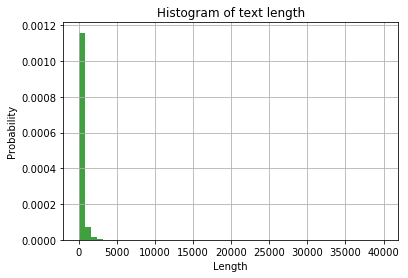

In [14]:
# the histogram of the data
plt.hist(text_length.values, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Length')
plt.ylabel('Probability')
plt.title('Histogram of text length')
plt.grid(True)
plt.show()

# Dates

In [15]:
df.shape

(315243, 8)

# Final cleaning

In [16]:
#drop non informative
df = df[(df.ups >= 10) | (df.ups <= 1)]

In [17]:
df["funny"] = df.ups >= 10

In [18]:
df.shape

(224929, 9)

In [19]:
df["full_text"] = df.title + "\n " + df.text

In [20]:
df

,date,downs,score,text,title,ups,upvote_ratio,url,funny,full_text
id,,,,,,,,,,
6z8wju,1.505058e+09,0,1,"She cant make a Yo Mama Joke, oh wait, that’s ...",Yo Mama So Stupid.....,1,1.00,https://www.reddit.com/r/Jokes/comments/6z8wju...,False,Yo Mama So Stupid.....\n She cant make a Yo Ma...
6z8vwj,1.505058e+09,0,0,\nSnacks.,What do cannibals call midgets?,0,0.50,https://www.reddit.com/r/Jokes/comments/6z8vwj...,False,What do cannibals call midgets?\n \nSnacks.
6z8vgv,1.505058e+09,0,1,I only come once a year,My wife makes me feel like christmas,1,1.00,https://www.reddit.com/r/Jokes/comments/6z8vgv...,False,My wife makes me feel like christmas\n I only ...
6z8vea,1.505058e+09,0,1,Pennywise.,What do you call someone who gets their 1p cha...,1,1.00,https://www.reddit.com/r/Jokes/comments/6z8vea...,False,What do you call someone who gets their 1p cha...
6z8uq9,1.505058e+09,0,0,Woman's husband would always come home drunk. ...,You been drinking tonight?,0,0.50,https://www.reddit.com/r/Jokes/comments/6z8uq9...,False,You been drinking tonight?\n Woman's husband w...
6z8ts1,1.505057e+09,0,0,So they can go fuck themselves,Priests in India are allowed to have sex,0,0.50,https://www.reddit.com/r/Jokes/comments/6z8ts1...,False,Priests in India are allowed to have sex\n So ...
6z8tpt,1.505057e+09,0,0,Because Trump will deport him. No illegal immi...,Why won't Hurricane Jose hit the USA?,0,0.33,https://www.reddit.com/r/Jokes/comments/6z8tpt...,False,Why won't Hurricane Jose hit the USA?\n Becaus...
6z8tnf,1.505057e+09,0,0,"Every time there is a powerful woman, there is...",The Thing About Irma and Jose,0,0.50,https://www.reddit.com/r/Jokes/comments/6z8tnf...,False,The Thing About Irma and Jose\n Every time the...
6z8t2q,1.505057e+09,0,1,Hot air baboon,What type of monkey can fly?,1,1.00,https://www.reddit.com/r/Jokes/comments/6z8t2q...,False,What type of monkey can fly?\n Hot air baboon


In [21]:
df = df.loc[:, ["funny", "full_text"]]

In [27]:
print(df.ix[4,"full_text"])

You been drinking tonight?
 Woman's husband would always come home drunk. She got tired of it so one night she locked the door.

Husband comes home, sees the door is locked, and drunkenly yells out "baby it's me! Lemme in!"

She yelled back, "you been drinking tonight?"

"No, baby. I ain't been drinkin!"

She knew he was lying so she told him, "blow through the keyhole. Lemme smell your breath."

So he blows through the keyhole. Nothing but whiskey. 

"I knew it! Get out of here until you sober up."

So he wanders off and falls asleep. Next day before he goes home he thinks, "I know what I'll do. I'll eat a can of sardines before I go home. That'll cover up the whiskey and she'll let me in."

So he eats the sardines, goes home, and yells "it's me, baby. Lemme in!"

Once again she yells back, "you been drinking tonight?"

"No, baby. I ain't been drinking."

"Blow through the keyhole."

So he blows through the keyhole. Nothing but sardines.

She yells back, "You son of a bitch! I break y

In [31]:
#now split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.125, random_state = 123, stratify = df.funny)

In [33]:
from sklearn.externals import joblib

In [36]:
joblib.dump(train,os.path.join(PROJECT_DIR,"data","interim","train.pkl"))

['C:\\Users\\wertu\\Documents\\Datascience\\udacity-ml-capstone\\notebooks\\..\\data\\interim\\train.pkl']

In [37]:
joblib.dump(test,os.path.join(PROJECT_DIR,"data","interim","test.pkl"))

['C:\\Users\\wertu\\Documents\\Datascience\\udacity-ml-capstone\\notebooks\\..\\data\\interim\\test.pkl']